# Just testing the datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
optdigits_df=pd.read_csv('optdigits_csv.csv')
optdigits_df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
5616,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
5618,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [3]:
data_features=optdigits_df.iloc[:,:64]
data_features

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input55,input56,input57,input58,input59,input60,input61,input62,input63,input64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [4]:
data_labels=optdigits_df.iloc[:,64:]
data_labels

,class
0,0
1,0
2,7
3,4
4,6
...,...
5615,9
5616,0
5617,8
5618,9


In [5]:
def normalising_function(X):
    X_standard=StandardScaler().fit_transform(X)
    X_mean=np.mean(X_standard,axis=0)
    X_cov=(X_standard - X_mean).T.dot((X_standard - X_mean))/(X_standard.shape[0]-1)
    return X_standard,X_mean,X_cov

In [6]:
def Principal_Component_Analysis(X):
    X_standard,X_mean,X_cov=normalising_function(X)
    
    fig=plt.figure(figsize=(10,10))
    sns.heatmap(pd.DataFrame(X_cov))
    plt.show()
    
    eigenvalues, eigenvectors = np.linalg.eig(X_cov)
    
    unsorted_eigen_value_vector_pair=[(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
    sorted_eigen_value_vector_pair=sorted(unsorted_eigen_value_vector_pair, reverse=True, key=lambda x:x[0])

    fig=plt.figure(figsize=(15,4))
    sns.heatmap(pd.DataFrame([pair[1] for pair in sorted_eigen_value_vector_pair[0:21]]),annot=False,cmap='coolwarm',vmin=-0.5,vmax=0.5)
    plt.ylabel("Ranked Eigen Values")
    plt.xlabel("Eigen Vector Components")
    plt.show()
    
    lam_sum=sum(eigenvalues)
    explained_variance=[(lam_k/lam_sum) for lam_k in sorted(eigenvalues,reverse=True)]
    
    plt.figure(figsize=(6,4))
    plt.bar(range(len(explained_variance)),explained_variance,alpha=0.5,align='center',label='Individual Explained variance $\lambda_{k}$')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Ranked Principal Components')
    plt.title('Scree Graph')
    plt.legend(loc='best')
    plt.tight_layout()
    
    
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(111)
    ax1.plot(np.cumsum(explained_variance))
    ax1.set_ylim([0,1.0])
    ax1.set_xlabel('Number of Principal Components')
    ax1.set_ylabel('Cumulative explained variance')
    ax1.set_title('Explained Variance')
    plt.show()


    print("Choosing 5 Principal Components explains : ",np.cumsum(explained_variance)[5], "% of variance")
    print("Choosing 25 Principal Components explains : ",np.cumsum(explained_variance)[25], "% of variance")
    print("Choosing 32 Principal Components explains : ",np.cumsum(explained_variance)[32], "% of variance")

    print([(j, np.cumsum(explained_variance)[j]) for j in range(len(explained_variance[:64]))])
    
    return

In [7]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris() #dataset is stored in iris 
class PCA: #defining a class called PCA
    def __init__(self, n_components): #constructor 
        self.n_components = n_components # no. of components
        self.components = None
        self.mean = None

    def fit(self, X): #fit method
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        cov = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov)

        eigenvectors = eigenvectors.T
        #print(eigenvalues)
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        #print(eigenvalues)
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[0:self.n_components]

    def transform(self, X): #transform method
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)


In [8]:
X_standard,X_mean,X_cov=normalising_function(X_train)
X_standard

NameError: name 'X_train' is not defined

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data_features,data_labels, test_size=0.2, random_state=1)

In [7]:
X_train

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input55,input56,input57,input58,input59,input60,input61,input62,input63,input64
579,0,2,12,16,14,1,0,0,0,12,...,11,0,0,1,14,16,16,12,3,0
19,0,0,0,2,13,12,4,0,0,0,...,0,0,0,0,0,0,15,3,0,0
3610,0,0,6,12,14,5,0,0,0,4,...,1,0,0,1,12,16,14,5,0,0
2025,0,0,6,15,16,13,1,0,0,0,...,0,0,0,0,7,16,0,0,0,0
4251,0,0,0,1,12,7,0,0,0,0,...,0,0,0,0,0,3,15,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,1,9,12,14,6,0,0,0,6,...,11,0,0,0,10,16,16,7,0,0
5192,0,0,0,8,13,0,0,0,0,0,...,11,0,0,0,1,11,12,4,0,0
3980,0,0,10,16,14,1,0,0,0,0,...,0,0,0,0,13,9,0,0,0,0
235,0,0,4,15,11,2,0,0,0,0,...,4,0,0,0,2,10,16,10,0,0


In [8]:
Y_train

,class
579,3
19,4
3610,8
2025,7
4251,1
...,...
905,9
5192,6
3980,7
235,0


In [9]:
X_test

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input55,input56,input57,input58,input59,input60,input61,input62,input63,input64
5291,0,0,0,4,14,14,1,0,0,0,...,3,0,0,0,0,2,16,14,0,0
3496,0,0,0,1,13,12,1,0,0,0,...,4,0,0,0,0,0,11,16,5,0
2078,0,0,6,14,16,13,0,0,0,6,...,0,0,0,0,2,12,12,0,0,0
4824,0,0,0,1,15,2,0,0,0,0,...,0,0,0,0,0,2,16,5,0,0
440,0,0,5,13,1,0,0,0,0,0,...,5,0,0,0,4,14,16,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,0,0,2,10,16,12,0,0,0,2,...,3,0,0,0,1,11,14,6,0,0
4078,0,0,5,14,15,2,0,0,0,0,...,0,0,0,0,6,16,16,8,0,0
4096,0,0,4,12,16,10,0,0,0,0,...,0,0,0,0,6,12,0,0,0,0
4221,0,0,7,13,3,0,0,0,0,0,...,16,3,0,0,6,15,6,9,9,1


In [10]:
Y_test

,class
5291,8
3496,1
2078,8
4824,4
440,6
...,...
3196,3
4078,8
4096,7
4221,2


In [11]:
print("Shape of Training Data = ", X_train.shape)
print("Shape of Training Labels = ",Y_train.shape)
print("Shape of Testing Data = ",X_test.shape)
print("Shape of Testing Labels = ",Y_test.shape)

Shape of Training Data =  (4496, 64)
Shape of Training Labels =  (4496, 1)
Shape of Testing Data =  (1124, 64)
Shape of Testing Labels =  (1124, 1)


In [12]:
firstimage=X_train.iloc[0,:].to_numpy().reshape(8,8)
firstimage

array([[ 0,  2, 12, 16, 14,  1,  0,  0],
       [ 0, 12, 12,  8, 16,  7,  0,  0],
       [ 0,  2,  1,  1, 16,  8,  0,  0],
       [ 0,  0,  2, 14, 16, 10,  0,  0],
       [ 0,  0,  1, 11, 12, 16,  7,  0],
       [ 0,  0,  0,  0,  0, 15, 12,  0],
       [ 0,  3, 13,  6,  4, 16, 11,  0],
       [ 0,  1, 14, 16, 16, 12,  3,  0]])

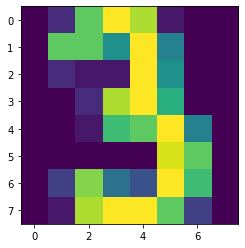

In [13]:
plt.imshow(firstimage)

In [14]:
print("Label of this first image : ",int(Y_train.iloc[0]))

Label of this first image :  3


array([[ 0.        ,  1.88758124,  1.4060955 , ...,  0.89897115,
         0.2087321 , -0.18225272],
       [ 0.        , -0.34279071, -1.15325352, ..., -0.6455248 ,
        -0.52120789, -0.18225272],
       [ 0.        , -0.34279071,  0.12642099, ..., -0.30230348,
        -0.52120789, -0.18225272],
       ...,
       [ 0.        , -0.34279071,  0.97953733, ..., -1.16035679,
        -0.52120789, -0.18225272],
       [ 0.        , -0.34279071, -0.30013718, ...,  0.55574983,
        -0.52120789, -0.18225272],
       [ 0.        , -0.34279071, -1.15325352, ..., -0.47391414,
        -0.52120789, -0.18225272]])

In [17]:
print("Type : ", type(X_standard), "Shape : ", X_standard.shape)

Type :  <class 'numpy.ndarray'> Shape :  (4496, 64)


In [18]:
print("Type : ", type(X_mean), "Shape : ", X_mean.shape)

Type :  <class 'numpy.ndarray'> Shape :  (64,)


In [19]:
print("Type : ", type(X_cov), "Shape : ", X_cov.shape)

Type :  <class 'numpy.ndarray'> Shape :  (64, 64)


In [ ]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(X_cov))
plt.show()

In [21]:
eigenvalues, eigenvectors = np.linalg.eig(X_cov)

In [22]:
print("Shape of Eigen Values : ", eigenvalues.shape)
print("Shape of Eigen Vectors : ", eigenvectors.shape)

Shape of Eigen Values :  (64,)
Shape of Eigen Vectors :  (64, 64)


In [23]:
unsorted_eigen_value_vector_pair=[(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
sorted_eigen_value_vector_pair=sorted(unsorted_eigen_value_vector_pair, reverse=True, key=lambda x:x[0])

In [24]:
sorted_eigen_value_vector_pair[0]

(7.2449823410946825,
 array([ 0.        , -0.17593708, -0.27381533, -0.22090464,  0.07746313,
         0.07740668,  0.09344436,  0.07968323, -0.0168729 , -0.23255011,
        -0.23487492,  0.04337104, -0.03312167,  0.01058134,  0.12807355,
         0.10924037, -0.00816945, -0.13317189,  0.01338182,  0.10172268,
        -0.13310413,  0.0525222 ,  0.19599759,  0.11054994,  0.00049626,
         0.09196325,  0.1551307 , -0.03325998, -0.12049591,  0.152043  ,
         0.20002369,  0.05449788,  0.04715782,  0.2101183 ,  0.2045493 ,
         0.00475376,  0.01412527,  0.16706605,  0.122224  ,  0.        ,
         0.07805818,  0.16842634,  0.09792511,  0.02383812,  0.13674084,
         0.10824246, -0.0416783 , -0.00565393,  0.04778371, -0.03303074,
        -0.15659858, -0.06069892,  0.0855428 , -0.08919586, -0.15072899,
        -0.0472321 , -0.00108897, -0.15556849, -0.26170738, -0.19712801,
        -0.05493151, -0.14104259, -0.15266851, -0.07676771]))

In [25]:
sorted_eigen_value_vector_pair[1]

(6.271044501030116,
 array([ 0.        ,  0.07028426,  0.1143069 ,  0.04819986,  0.15064566,
         0.2622585 ,  0.2384825 ,  0.13697936,  0.00125285,  0.06189421,
         0.05607329, -0.11644188,  0.03884493,  0.23594232,  0.25860767,
         0.12774027,  0.00098267, -0.00255475, -0.14059099, -0.13856549,
         0.07962639,  0.17845326,  0.14251244,  0.05273079, -0.00372484,
        -0.0765233 , -0.15179471,  0.05677627,  0.19811569,  0.14982545,
         0.0379975 ,  0.0008735 , -0.00959326, -0.15100715, -0.15876493,
         0.04832324,  0.10789601,  0.02089485, -0.04285355,  0.        ,
        -0.03565308, -0.1448336 , -0.22607116, -0.02883925,  0.06904473,
        -0.10127718, -0.19303879, -0.07787741, -0.02750892, -0.05031978,
        -0.14122118, -0.0301547 , -0.01344117, -0.16845934, -0.21136349,
        -0.11157757, -0.0025443 ,  0.06023088,  0.13968406,  0.03712391,
        -0.24513243, -0.2041636 , -0.14093627, -0.05698891]))

In [26]:
sorted_eigen_value_vector_pair[2]

(4.7836166437277665,
 array([ 0.        , -0.02601374,  0.06197119,  0.09149086,  0.04902698,
         0.03550085,  0.00747237, -0.01034902, -0.00854114,  0.05561719,
         0.19692771, -0.11956444, -0.07106771,  0.13922943,  0.0254254 ,
        -0.00567475, -0.0190469 ,  0.13942857,  0.1505518 , -0.20761944,
        -0.1378782 ,  0.1665425 ,  0.10322489, -0.00268646, -0.02245371,
         0.14076281,  0.07762699, -0.13138791, -0.09411457,  0.16717231,
         0.17469023,  0.00129167, -0.01248686,  0.05890528, -0.04994569,
        -0.26694785, -0.2570098 ,  0.16708319,  0.25176054,  0.        ,
        -0.03217002,  0.00732427, -0.04256879, -0.31927762, -0.29531414,
         0.16681917,  0.2172426 , -0.03918722, -0.02444608, -0.00534784,
         0.06678308, -0.19161317, -0.12620978,  0.17047224,  0.03037697,
        -0.09802528, -0.01277628, -0.03538428,  0.056413  ,  0.12578006,
         0.06877889, -0.00602681, -0.11664066, -0.09251002]))

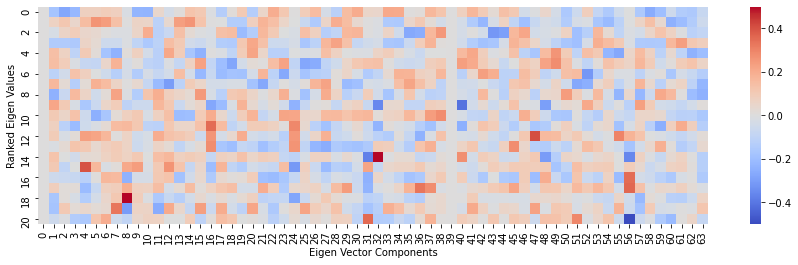

In [27]:
fig=plt.figure(figsize=(15,4))
sns.heatmap(pd.DataFrame([pair[1] for pair in sorted_eigen_value_vector_pair[0:21]]),annot=False,cmap='coolwarm',vmin=-0.5,vmax=0.5)
plt.ylabel("Ranked Eigen Values")
plt.xlabel("Eigen Vector Components")
plt.show()

In [28]:
lam_sum=sum(eigenvalues)
explained_variance=[(lam_k/lam_sum) for lam_k in sorted(eigenvalues,reverse=True)]

In [29]:
explained_variance

[0.11682856310706477,
 0.10112338218965353,
 0.0771379463234569,
 0.058935690786268306,
 0.04883860228612383,
 0.04502040698663441,
 0.03861392192211655,
 0.034370337473711765,
 0.028496277538690266,
 0.026731206043400957,
 0.026306466113619607,
 0.024522587040143564,
 0.023239658229965782,
 0.021047116383731242,
 0.020135883430360397,
 0.01937912495911091,
 0.018163699918943434,
 0.0177342402661584,
 0.016139965721460113,
 0.01531626820248217,
 0.01467793848676501,
 0.013361949549638376,
 0.012344377584641695,
 0.011306601303226096,
 0.010502879308668752,
 0.010026804778632234,
 0.009030099938738883,
 0.008950092305715298,
 0.008607399117096863,
 0.008213627793380439,
 0.007764908448754513,
 0.007339062075362256,
 0.007087563087525016,
 0.006316296201860201,
 0.006111503129675183,
 0.005975599542603176,
 0.0054402920059637835,
 0.00512428424192502,
 0.004868557004021335,
 0.004482144411450576,
 0.004342729283128952,
 0.004073564278123213,
 0.003940974517830927,
 0.0035087305926510275,

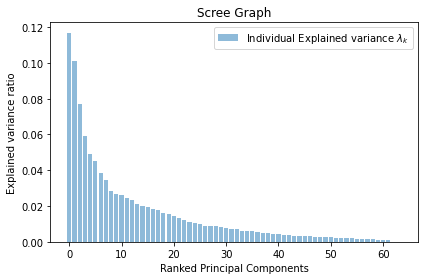

In [30]:
plt.figure(figsize=(6,4))
plt.bar(range(len(explained_variance)),explained_variance,alpha=0.5,align='center',label='Individual Explained variance $\lambda_{k}$')

plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title('Scree Graph')
plt.legend(loc='best')
plt.tight_layout()

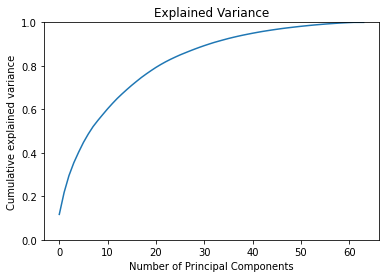

In [31]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
ax1.plot(np.cumsum(explained_variance))
ax1.set_ylim([0,1.0])
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative explained variance')
ax1.set_title('Explained Variance')
plt.show()

In [32]:
print("Choosing 5 Principal Components explains : ",np.cumsum(explained_variance)[5], "% of variance")
print("Choosing 25 Principal Components explains : ",np.cumsum(explained_variance)[25], "% of variance")
print("Choosing 32 Principal Components explains : ",np.cumsum(explained_variance)[32], "% of variance")

Choosing 5 Principal Components explains :  0.44788459167920175 % of variance
Choosing 25 Principal Components explains :  0.8503018959346693 % of variance
Choosing 32 Principal Components explains :  0.9072946487012427 % of variance


In [33]:
print([(j, np.cumsum(explained_variance)[j]) for j in range(len(explained_variance[:64]))])

[(0, 0.11682856310706477), (1, 0.2179519452967183), (2, 0.2950898916201752), (3, 0.3540255824064435), (4, 0.40286418469256735), (5, 0.44788459167920175), (6, 0.4864985136013183), (7, 0.5208688510750301), (8, 0.5493651286137203), (9, 0.5760963346571213), (10, 0.6024028007707409), (11, 0.6269253878108845), (12, 0.6501650460408502), (13, 0.6712121624245815), (14, 0.6913480458549419), (15, 0.7107271708140528), (16, 0.7288908707329962), (17, 0.7466251109991546), (18, 0.7627650767206148), (19, 0.778081344923097), (20, 0.792759283409862), (21, 0.8061212329595004), (22, 0.8184656105441421), (23, 0.8297722118473683), (24, 0.840275091156037), (25, 0.8503018959346693), (26, 0.8593319958734082), (27, 0.8682820881791236), (28, 0.8768894872962204), (29, 0.8851031150896008), (30, 0.8928680235383554), (31, 0.9002070856137177), (32, 0.9072946487012427), (33, 0.9136109449031029), (34, 0.9197224480327781), (35, 0.9256980475753813), (36, 0.9311383395813451), (37, 0.9362626238232701), (38, 0.94113118082729

In [34]:
matW = np.hstack( pair[1].reshape(64,1) for pair in sorted_eigen_value_vector_pair[0:32])#[0:4] originally
print(matW.shape)

(64, 32)
<ipython-input-34-9274d5fccee0>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matW = np.hstack( pair[1].reshape(64,1) for pair in sorted_eigen_value_vector_pair[0:32])#[0:4] originally


In [35]:
Z = X_standard.dot(matW)
#Z = matW.T.dot(X_standard.T)
print(Z.shape)

(4496, 32)


In [36]:
Z.T

array([[-4.68984633,  5.68405028, -0.98747352, ...,  0.73961335,
         0.81079369, -0.4451384 ],
       [ 0.46828809,  1.68189166,  1.39368625, ...,  1.3549725 ,
        -2.58895779,  0.63884044],
       [ 2.15289531,  0.88235876,  0.04787519, ..., -1.99782126,
         3.13776076, -5.02807144],
       ...,
       [-0.03961872, -0.29000184,  0.3516749 , ...,  1.02981   ,
        -0.1854482 , -1.01751432],
       [-0.13395758, -0.5387159 , -0.52934364, ...,  0.40962813,
        -0.72505847,  0.18310449],
       [-0.17723578, -0.19673928,  0.33037332, ...,  0.61418073,
        -0.48776592,  0.36210787]])